In [1]:
import sys
sys.argv=['/usr/bin/python',]

In [2]:
import tensorflow as tf

import random
import numpy as np
import os
#from generator import get_training_and_testing_generators

import h5py
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
from model import create_model_infant_seg

Using ./config.ini as config file.


In [3]:
from main import __test

Using ./config.ini as config file.


In [4]:
td = __test()

>>> STAGE 1 TRAINING <<<
>>> MODEL CREATED
>>> OPTIMIZER CREATED


In [17]:
import predict_multimodality_sitk
from predict_multimodality_sitk import eval_test_images_in_sitk

In [16]:
reload(predict_multimodality_sitk)

<module 'predict_multimodality_sitk' from 'predict_multimodality_sitk.pyc'>

In [6]:
from train import _initialize_variables

In [7]:
_initialize_variables(td)

**Training**: restore last checkpoint from:/proj/NIRAL/users/siyangj/NewModels/model_0220_no_pretraining/models/1/whole/snapshot_best
INFO:tensorflow:Restoring parameters from /proj/NIRAL/users/siyangj/NewModels/model_0220_no_pretraining/models/1/whole/snapshot_best


In [18]:
blah = eval_test_images_in_sitk(td)

>> begin predict nifit image: /proj/NIRAL/users/siyangj/myData/min_normal/T1/5.nrrd
>> load nifti image finish..shape=(96, 112, 96)
crop_index (0, 96, 0, 112, 0, 96)
>> begin predict likelihood of each patch ..
>> begin vote in overlapped patch..
in vote: predictions.shape=(1, 1, 96, 112, 96, 4)
predit patches of 1 image, cost [  0] seconds
**>> img_data_t2  (96, 112, 96)
final_segmentation  (96, 112, 96)
>> begin predict nifit image: /proj/NIRAL/users/siyangj/myData/min_normal/T1/2.nrrd
>> load nifti image finish..shape=(96, 112, 96)
crop_index (0, 96, 0, 112, 0, 96)
>> begin predict likelihood of each patch ..
>> begin vote in overlapped patch..
in vote: predictions.shape=(1, 1, 96, 112, 96, 4)
predit patches of 1 image, cost [  0] seconds
**>> img_data_t2  (96, 112, 96)
final_segmentation  (96, 112, 96)
>> begin predict nifit image: /proj/NIRAL/users/siyangj/myData/min_normal/T1/1.nrrd
>> load nifti image finish..shape=(96, 112, 96)
crop_index (0, 96, 0, 112, 0, 96)
>> begin predict

In [19]:
blah

array([0.9983114 , 0.85173545, 0.84089929, 0.83992813])

In [34]:
from util.utils import Dice

In [46]:
def Dice(pred,true,labels=[0,1,2,3]):
    l = len(labels)
    ret = np.zeros(l)
    for i in range(l):
        lab = labels[i]
        p = pred==lab
        t = true==lab
        print np.logical_and(p,t).sum(),p.sum(),t.sum()
        ret[i] = 2*float(np.logical_and(p,t).sum())/(p.sum()+t.sum())
        print ret[i]
    return ret

In [47]:
Dice(seg_list[0],true_label[0])

589986 590467 589986
0.9995925293086637
146100 191167 171139
0.8065005823806396
146364 169260 207206
0.7775682266127618
58167 81298 63861
0.8014246446999497


array([0.99959253, 0.80650058, 0.77756823, 0.80142464])

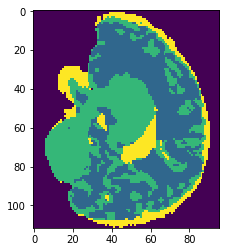

In [31]:
plt.imshow(seg_list[0][60,:,:])

In [38]:
np.unique(true_label)

array([0, 1, 2, 3], dtype=int16)

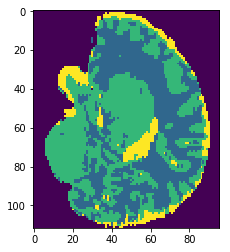

In [32]:
plt.imshow(true_label[0][60,:,:])

In [4]:
td = __test()

>>> STAGE 1 TRAINING <<<
>>> MODEL CREATED
>>> OPTIMIZER CREATED


In [5]:
td.val_sum_writer = tf.summary.FileWriter('.', td.sess.graph)

In [8]:
try:
    init_op = td.sess.graph.get_operation_by_name('init')
except KeyError as e:
    init_op = tf.global_variables_initializer()
td.sess.run(init_op)

In [12]:
init_op = tf.global_variables_initializer()

In [13]:
len(td.sess.graph.as_graph_def().node)

6672

In [16]:
td.sess.run(td.zero_ops)

[array([[[[[0., 0., 0., ..., 0., 0., 0.]],
 
          [[0., 0., 0., ..., 0., 0., 0.]],
 
          [[0., 0., 0., ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0., ..., 0., 0., 0.]],
 
          [[0., 0., 0., ..., 0., 0., 0.]],
 
          [[0., 0., 0., ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0., ..., 0., 0., 0.]],
 
          [[0., 0., 0., ..., 0., 0., 0.]],
 
          [[0., 0., 0., ..., 0., 0., 0.]]]],
 
 
 
        [[[[0., 0., 0., ..., 0., 0., 0.]],
 
          [[0., 0., 0., ..., 0., 0., 0.]],
 
          [[0., 0., 0., ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0., ..., 0., 0., 0.]],
 
          [[0., 0., 0., ..., 0., 0., 0.]],
 
          [[0., 0., 0., ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0., ..., 0., 0., 0.]],
 
          [[0., 0., 0., ..., 0., 0., 0.]],
 
          [[0., 0., 0., ..., 0., 0., 0.]]]],
 
 
 
        [[[[0., 0., 0., ..., 0., 0., 0.]],
 
          [[0., 0., 0., ..., 0., 0., 0.]],
 
          [[0., 0., 0., ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0., ...,

In [19]:
td.sess.graph.get_all_collection_keys()

['train_op',
 'trainable_variables',
 'variables',
 'cond_context',
 'update_ops',
 'model_variables']

In [16]:
tf.reset_default_graph()

In [21]:
td.sess.graph.get_collection('update_ops')

[<tf.Operation 't1_conv1a/t1_conv1a/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 't1_conv1a/t1_conv1a/AssignMovingAvg_1' type=AssignSub>,
 <tf.Operation 't1_conv2a/t1_conv2a/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 't1_conv2a/t1_conv2a/AssignMovingAvg_1' type=AssignSub>,
 <tf.Operation 't1_conv3a/t1_conv3a/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 't1_conv3a/t1_conv3a/AssignMovingAvg_1' type=AssignSub>,
 <tf.Operation 't1_conv3b/t1_conv3b/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 't1_conv3b/t1_conv3b/AssignMovingAvg_1' type=AssignSub>,
 <tf.Operation 't1_conv4a/t1_conv4a/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 't1_conv4a/t1_conv4a/AssignMovingAvg_1' type=AssignSub>,
 <tf.Operation 't1_conv4b/t1_conv4b/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 't1_conv4b/t1_conv4b/AssignMovingAvg_1' type=AssignSub>,
 <tf.Operation 't2_conv1a/t2_conv1a/AssignMovingAvg' type=AssignSub>,
 <tf.Operation 't2_conv1a/t2_conv1a/AssignMovingAvg_1' type=AssignSub>,
 <tf.O